## Precipitation in the Sierra Nevada

[Lake Tahoe](https://www.fs.usda.gov/main/ltbmu/about-forest/about-area) was selected to highlight trends in Sierra Nevada precipitation. The mountain range functions as a collection of moisture islands. The range forms barriers to incoming weather systems so that air and moisture are lifted over them, condensing the moisture which falls as precipitation to build thick snowpacks. Given the high precipitation and low evapotranspiration, the [Sierra](https://www.fs.usda.gov/psw/publications/documents/psw_gtr272/psw_gtr272_013.pdf) produces most of the runoff forming my state's water supply. 

#### Site: SOUTH LAKE TAHOE, CA, US

<img src="south_lake_tahoe_station.png" alt="South Lake Tahoe Station" width="350px" height="420px">

#### Data Description

The South Lake Tahoe [subset](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:US1CAED0035/detail) of the [Global Historical Climatology Network daily dataset](https://www.ncei.noaa.gov/metadata/geoportal/rest/metadata/item/gov.noaa.ncdc:C00861/html) contains observations obtained at a weather station positioned at 1,919.6 m elevation. The station monitors rain and melted snow (mm); snow, ice pellets, and hail (mm); and snow, ice pellets, and hail on the ground (mm). 

#### Data Citation

Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeill, Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron E.Gleason, and Tamara G. Houston (2012): Global Historical Climatology Network - Daily (GHCN-Daily), Version 3. [GHCND:US1CAED0035]. NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ [09/15/2024].

#### Methods

The data was accessed from a National Centers for Environmental Information [API service](https://www.ncei.noaa.gov/support/access-data-service-api-user-documentation) and queried for the precipitation data type, station, and date range of 01-01-2022 to 12-31-2023. This range was chosen to gather full water years for comparison; the station began observing precipitation in late 2021. The CSV data file was ingested using the [pandas](https://pandas.pydata.org/) library and the date records were converted to a pandas datetime object. Using these datetimes, month and year data were generated. Next the data was subset to precipitation, month, and year, and grouped by the month and year average observed precipitation value. Some months contained sparse daily records and the averages identified reflect this limitation. Finally, visualization libraries [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/) were used to plot and display the relationship between month and precipitation across annual groupings.  

#### Analysis

In [2]:
import warnings
# Ignore FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# NCEI API URL

SLT_DAILY_PREP_URL = ("https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries"+
                      "&dataTypes=PRCP&stations=US1CAED0035&startDate=2022-01-01&endDate=2023-12-31")

# Import precipitation data

slt_daily_precip = pd.read_csv(SLT_DAILY_PREP_URL) 

In [11]:
# Add months and years to dataframe

def create_dataframe_calendar_cols(df):
    # get the pandas datetime from DATE col 
    df['DATE'] = pd.to_datetime(df['DATE'])

    # get month
    df['MONTH'] = df['DATE'].dt.month
    df['MONTH'].astype('int')

    # get year 
    df['YEAR'] = df['DATE'].dt.year
    df['YEAR'].astype('int')

    return df

In [12]:
# Create calendar data and drop nulls

slt_daily_precip = create_dataframe_calendar_cols(slt_daily_precip)
slt_daily_precip.dropna(inplace=True)

In [13]:
# Convert from millimeters to inches

def convert_to_inches(obs):
    if (obs == 0.0):
        return obs
    else: 
        return obs / 25.4

In [14]:
# Convert precipitation metric

slt_daily_precip.PRCP = slt_daily_precip.PRCP.apply(convert_to_inches)

In [15]:
# Subset the columns of interest

slt_daily_precip = slt_daily_precip.loc[:, ['PRCP', 'MONTH', 'YEAR']]

In [21]:
# Group months by their mean observed precipitation value

slt_month_precip_avg = slt_daily_precip.groupby(by=["MONTH", "YEAR"]).mean() 
slt_month_precip_avg

PRCP
MONTH YEAR          
1     2022  0.196850
      2023  4.709646
2     2022  0.905512
      2023  4.243220
3     2022  1.047244
      2023  6.060180
4     2022  3.937008
      2023  0.603675
5     2023  1.343504
6     2022  0.564304
8     2022  1.272966
      2023  0.853018
9     2022  0.275591
      2023  2.900262
10    2022  0.000000
      2023  5.590551
11    2022  5.295276
12    2022  1.469816
      2023  4.124016

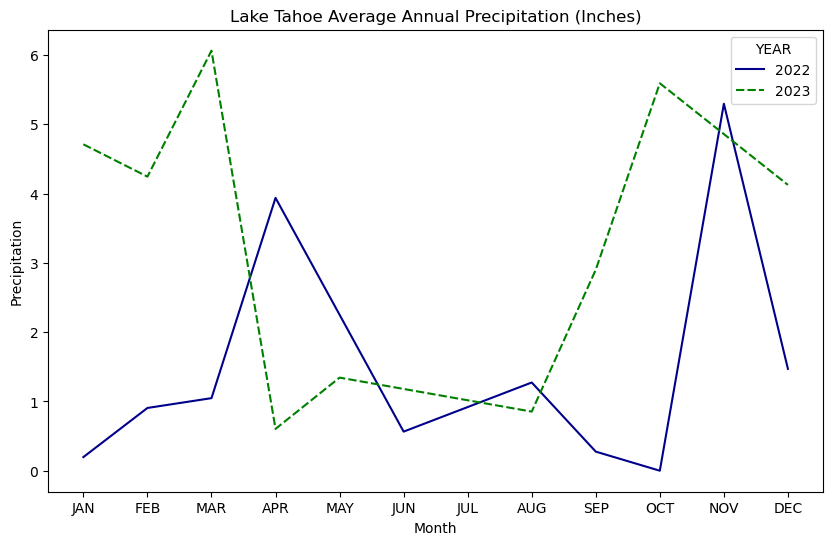

In [22]:
# Create annual precipitation plot

fig = plt.figure(figsize=(10, 6)) 
ax = plt.axes()
plt.title('Lake Tahoe Average Annual Precipitation (Inches)')
plt.legend([2022, 2023], loc='upper right')
plt.xlabel("Month")
plt.ylabel("Precipitation")
plt.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
           ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])

sns.lineplot(data=slt_month_precip_avg, x="MONTH", y="PRCP", hue="YEAR", style="YEAR", palette=['darkblue', 'g'])

fig.savefig("lt-avg-precip-2022-2023.png")

#### High Year-to-Year Precipitation Variability

The Sierra Nevada mountains receive most of their precipitation during a short wet period consisting of fix to six [atmospheric river storms](https://www.noaa.gov/stories/what-are-atmospheric-rivers) on average with great annual variability. A difference of one to two major storms can ensure a normal versus a dry water year. The above graph highlights the annual variance in precipitation with notable shifts in the early months when it is optimal for precipitation to fall as snow rather than rain, supporting longer streamflows later in the summer when demand is high. The majority of precipitation is expected between December through March, but [warmer temperatures](https://www.fs.usda.gov/psw/publications/documents/psw_gtr272/psw_gtr272_013.pdf) influence whether or not precipitation falls as snow. 

Atmospheric rivers are often associated with [flood risk](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2020GL088679) and are especially risky depending on when they occur. For instance, one of these events occurred in March 2023 (averaging 6 inches of precipitation) and in preparation for the event, the [City of South Lake Tahoe](https://sierranevadaalliance.org/city-of-south-lake-tahoe-urges-residents-to-prepare-for-impacts-of-rain-on-snow-event/) communicated the danger to local residents: "The potential of heavy rainfall across the region brings the threat of flooding and roof collapses. Flooding may occur as a result of rain on existing snow and ice on the ground, and streams and river basins that are already elevated after numerous storms." Atmospheric rivers are a natural component of Sierra hydrology and [provide about 60% of the state's developed water](https://sierranevada.ca.gov/what-we-do/#regionalChallenges), but they are expected to become more extreme under climate change with [projected precipitation](https://agupubs.onlinelibrary.wiley.com/doi/10.1029/2019JD031554) increasing 25% on average. How the state and stewards of the Sierra Nevada respond to shifts in precipitation will largely shape California's future resiliency. 